In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Set plot style
sns.set(style="whitegrid")

In [3]:
# Load datasets
customers = pd.read_csv("../data/Customers.csv")
transactions = pd.read_csv("../data/Transactions.csv")


In [4]:
# Merge datasets
data = pd.merge(transactions, customers, on="CustomerID")

In [5]:
# Feature engineering: Aggregate customer data
customer_summary = data.groupby('CustomerID').agg({
    'TotalValue': 'sum', 
    'Quantity': 'sum'
}).reset_index()

In [6]:
# Normalize features for clustering
scaler = StandardScaler()
X = scaler.fit_transform(customer_summary[['TotalValue', 'Quantity']])

In [7]:
# Elbow method to determine the optimal number of clusters
inertia = []
range_clusters = range(2, 11)  # Testing 2 to 10 clusters
for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)


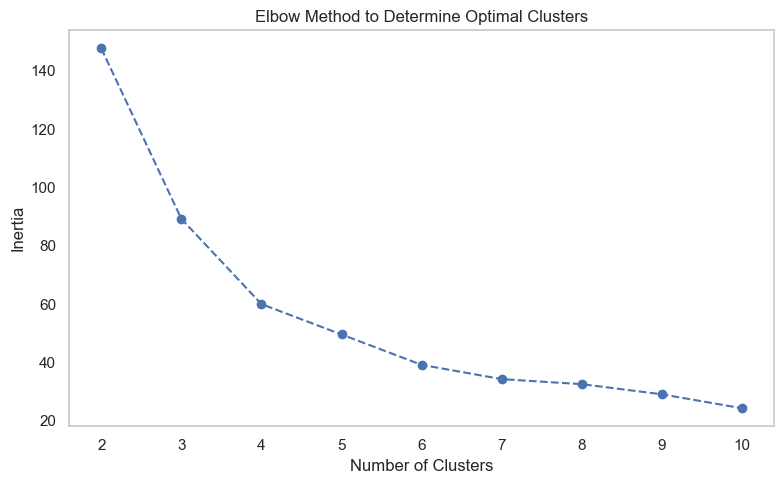

In [8]:
# Plot the elbow curve
plt.figure(figsize=(8, 5))
plt.plot(range_clusters, inertia, marker='o', linestyle='--', color='b')
plt.title('Elbow Method to Determine Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(range_clusters)
plt.grid()
plt.tight_layout()
plt.savefig("../outputs/elbow_curve.png")  # Save elbow curve plot
plt.show()

In [9]:
# Apply KMeans clustering with the optimal number of clusters
optimal_clusters = 4  # Replace with the best number of clusters based on the elbow curve
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
customer_summary['Cluster'] = kmeans.fit_predict(X)

In [10]:
# Evaluate clustering performance using Davies-Bouldin Index
db_index = davies_bouldin_score(X, customer_summary['Cluster'])
print(f"Davies-Bouldin Index for {optimal_clusters} clusters: {db_index}")

Davies-Bouldin Index for 4 clusters: 0.72127971818163


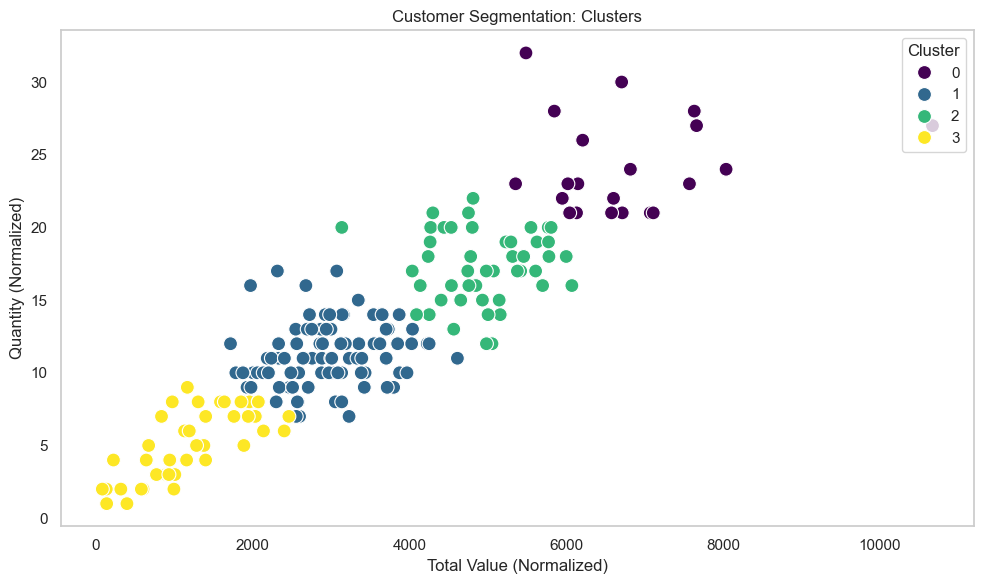

In [11]:
# Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x=customer_summary['TotalValue'], 
    y=customer_summary['Quantity'], 
    hue=customer_summary['Cluster'], 
    palette='viridis', 
    s=100
)
plt.title('Customer Segmentation: Clusters')
plt.xlabel('Total Value (Normalized)')
plt.ylabel('Quantity (Normalized)')
plt.legend(title='Cluster', loc='upper right')
plt.grid()
plt.tight_layout()
plt.savefig("../outputs/customer_clusters.png")  # Save cluster visualization
plt.show()

In [12]:
# Save clustering results
customer_summary.to_csv("../outputs/LalithaPriyadarshini_Baswapatri_Clustering_Results.csv", index=False)

In [13]:
# Display results
print("Clustering results:")
print(customer_summary.head())

Clustering results:
  CustomerID  TotalValue  Quantity  Cluster
0      C0001     3354.52        12        1
1      C0002     1862.74        10        1
2      C0003     2725.38        14        1
3      C0004     5354.88        23        0
4      C0005     2034.24         7        3
